In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 로지스틱 회귀
class LogisticRegression:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for _ in range(self.epochs):
            model = self.sigmoid(np.dot(X, self.weights) + self.bias)
            error = y - model
            self.weights += self.learning_rate * np.dot(X.T, error)
            self.bias += self.learning_rate * np.sum(error)
    
    def predict(self, X):
        model = self.sigmoid(np.dot(X, self.weights) + self.bias)
        return (model >= 0.5).astype(np.int32)
        

In [3]:
# 단층 퍼셉트론
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def activation(self, z):
        return np.where(z >= 0, 1, 0)
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.activation(np.dot(xi, self.weights) + self.bias))
                self.weights += update * xi
                self.bias += update
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)
        

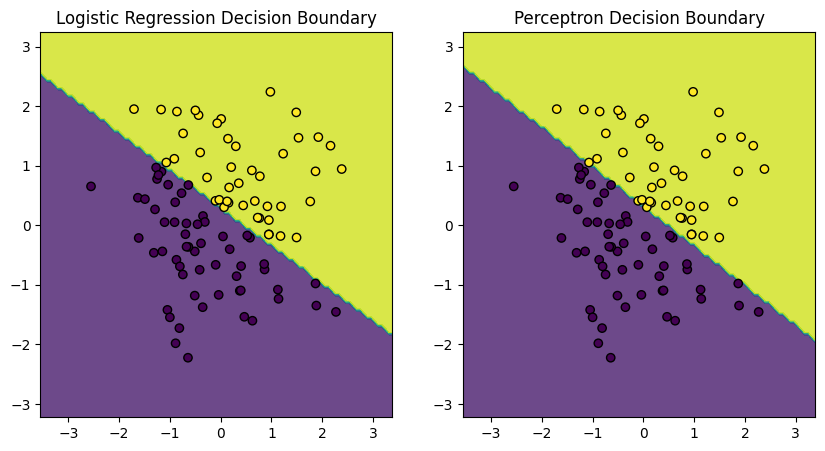

In [4]:
# 데이터셋 생성
np.random.seed(0)
X = np.random.randn(100, 2)
y = (2*X[:, 0] + 3*X[:, 1] - 1 > 0).astype(np.int32)

# 데이터셋 플로팅
plt.figure(figsize=(10, 5))


# 로지스틱 회귀 모델 학습
log_reg = LogisticRegression()
log_reg.fit(X, y)

# 단층 퍼셉트론 모델 학습
perceptron = Perceptron()
perceptron.fit(X, y)

# 예측 및 결정 경계 플로팅
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z_log_reg = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_log_reg = Z_log_reg.reshape(xx.shape)

Z_perceptron = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z_perceptron = Z_perceptron.reshape(xx.shape)

# 로지스틱 회귀 결정 경계
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_log_reg, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('Logistic Regression Decision Boundary')

# 퍼셉트론 결정 경계
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_perceptron, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('Perceptron Decision Boundary')

plt.show()
